In [4]:
import hist 
import uproot
import sys
import os
import matplotlib.pyplot as plt
import matplotlib

In [5]:
def get_histos_file(indir):
    files = []
    for x,y,z in os.walk(indir):
        for zi in z:
            if('histos' in zi):
                files.append(os.path.join(x,zi))
    return files

In [6]:
hist_files = get_histos_file("./data/run18")
print(hist_files)

['./data/run18/data/subrun0/WD035_0_histos.root', './data/run18/data/subrun0/WD034_0_histos.root', './data/run18/data/subrun0/WD038_0_histos.root']


In [11]:
def get_hists(files, refkey='AvT'):
    hists = {}
    for x in files:
        with uproot.open(x) as f:
            for key in f.keys():
                if(refkey not in key):
                    continue
                try:
                    hists[key] = f[key].to_hist()
                except:
                    print('cannot parse', key)
    return hists

In [12]:
hists = get_hists(hist_files)

In [13]:
hists

{'hAvT_35_6;1': Hist(
   Regular(100, 0, 2e-07, name='xaxis', label='t-t_{rf}'),
   Regular(100, 0, 0.5, name='yaxis', label='A'),
   storage=Double()) # Sum: 11154.0 (100000.0 with flow),
 'hAvT_35_7;1': Hist(
   Regular(100, 0, 2e-07, name='xaxis', label='t-t_{rf}'),
   Regular(100, 0, 0.5, name='yaxis', label='A'),
   storage=Double()) # Sum: 9770.0 (100000.0 with flow),
 'hAvT_35_8;1': Hist(
   Regular(100, 0, 2e-07, name='xaxis', label='t-t_{rf}'),
   Regular(100, 0, 0.5, name='yaxis', label='A'),
   storage=Double()) # Sum: 8567.0 (100000.0 with flow),
 'hAvT_35_9;1': Hist(
   Regular(100, 0, 2e-07, name='xaxis', label='t-t_{rf}'),
   Regular(100, 0, 0.5, name='yaxis', label='A'),
   storage=Double()) # Sum: 7006.0 (100000.0 with flow),
 'hAvT_35_10;1': Hist(
   Regular(100, 0, 2e-07, name='xaxis', label='t-t_{rf}'),
   Regular(100, 0, 0.5, name='yaxis', label='A'),
   storage=Double()) # Sum: 6254.0 (100000.0 with flow),
 'hAvT_35_11;1': Hist(
   Regular(100, 0, 2e-07, name='xax

In [14]:
hists.keys()

dict_keys(['hAvT_35_6;1', 'hAvT_35_7;1', 'hAvT_35_8;1', 'hAvT_35_9;1', 'hAvT_35_10;1', 'hAvT_35_11;1', 'hAvT_35_12;1', 'hAvT_35_13;1', 'hAvT_35_14;1', 'hAvT_35_15;1', 'hAvT_34_6;1', 'hAvT_34_7;1', 'hAvT_34_8;1', 'hAvT_34_9;1', 'hAvT_34_10;1', 'hAvT_34_11;1', 'hAvT_34_12;1', 'hAvT_34_13;1', 'hAvT_34_14;1', 'hAvT_34_15;1', 'hAvT_38_5;1', 'hAvT_38_6;1', 'hAvT_38_7;1', 'hAvT_38_8;1', 'hAvT_38_9;1', 'hAvT_38_10;1', 'hAvT_38_11;1', 'hAvT_38_12;1', 'hAvT_38_13;1', 'hAvT_38_14;1', 'hAvT_38_15;1', 'hAvT_38_16;1', 'hAvT_38_17;1'])

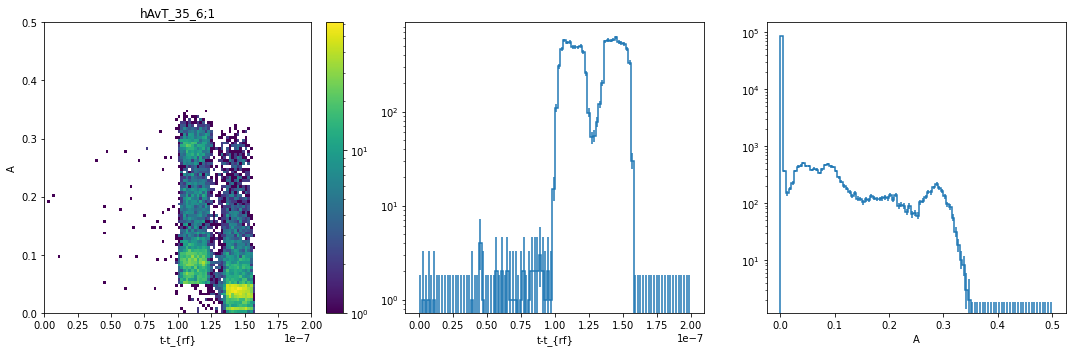

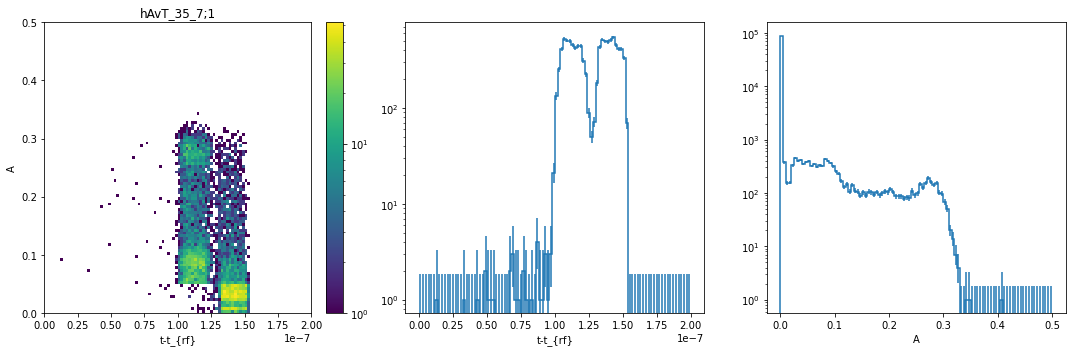

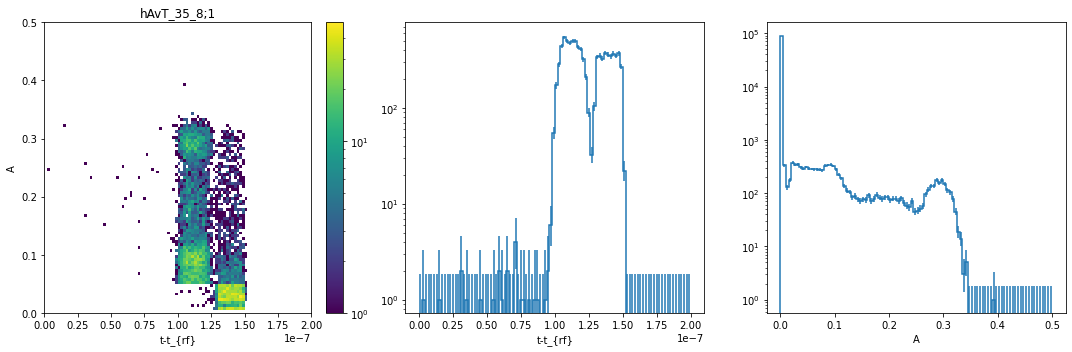

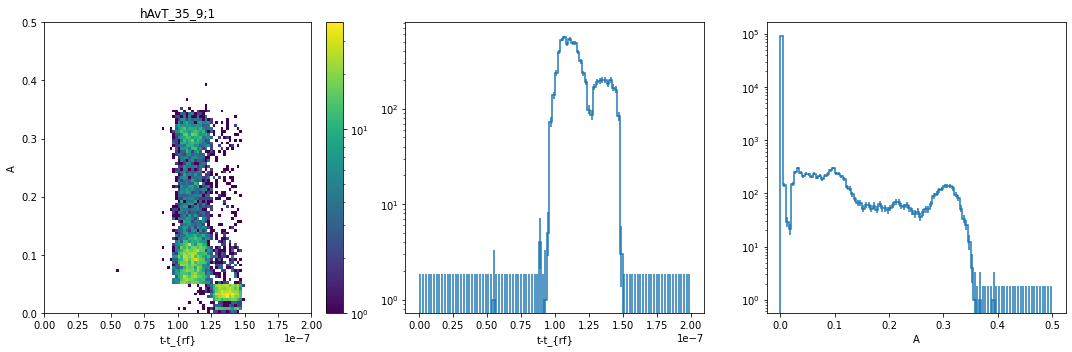

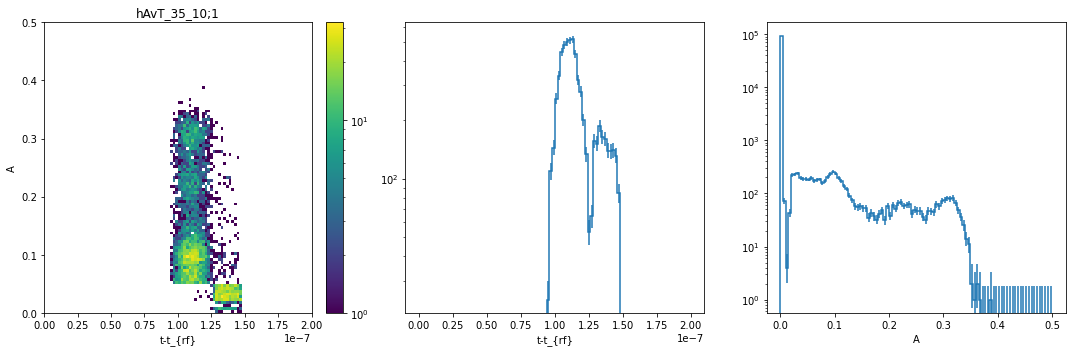

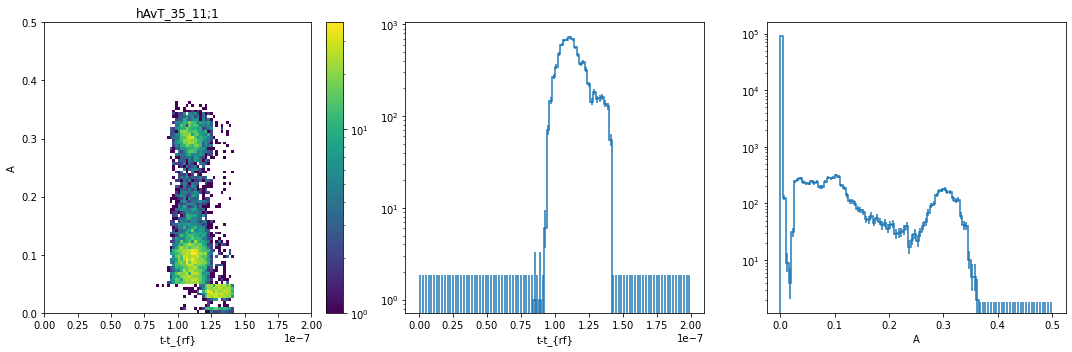

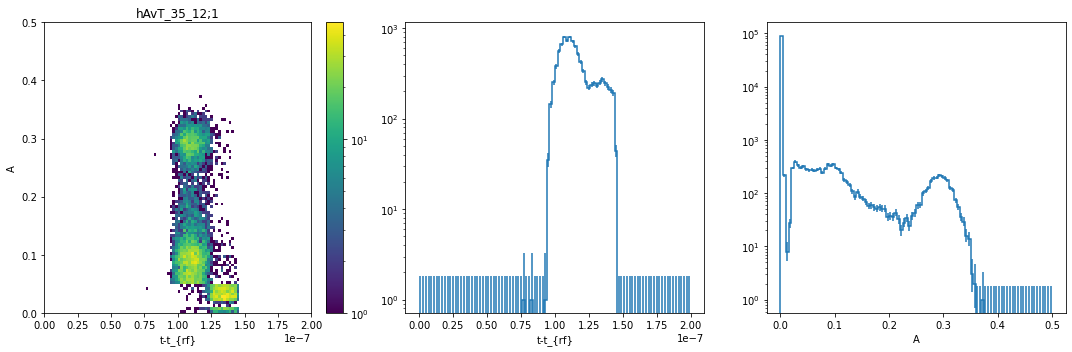

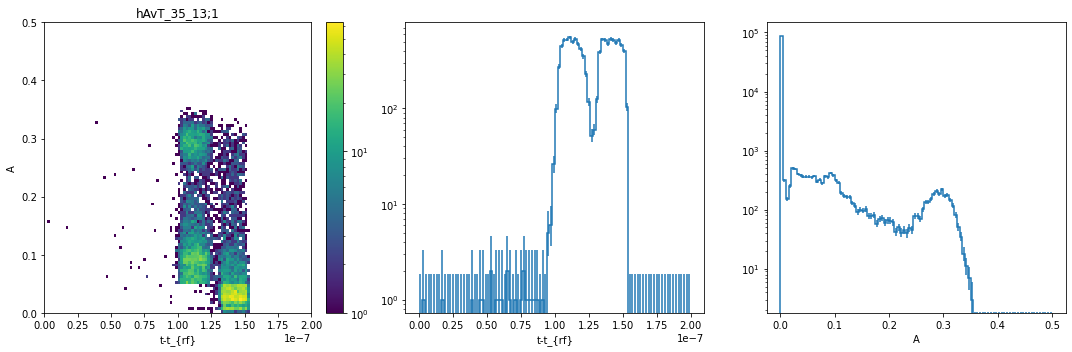

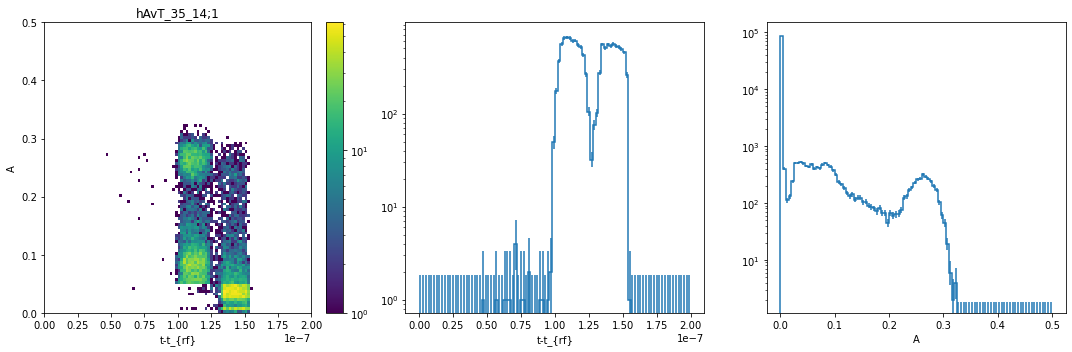

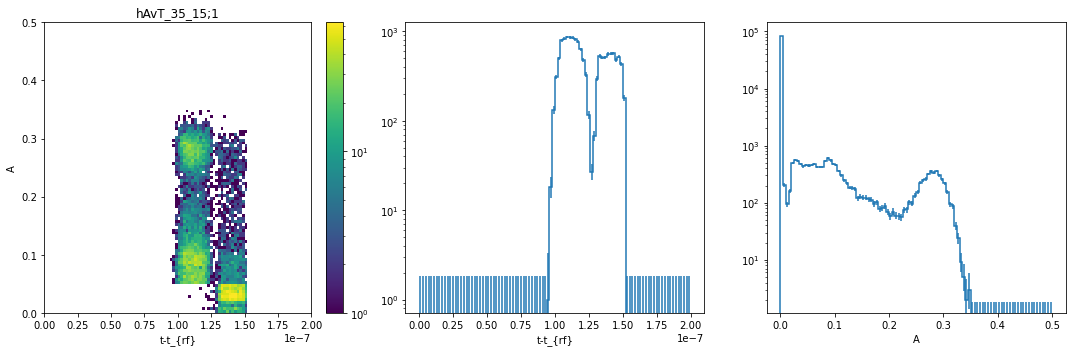

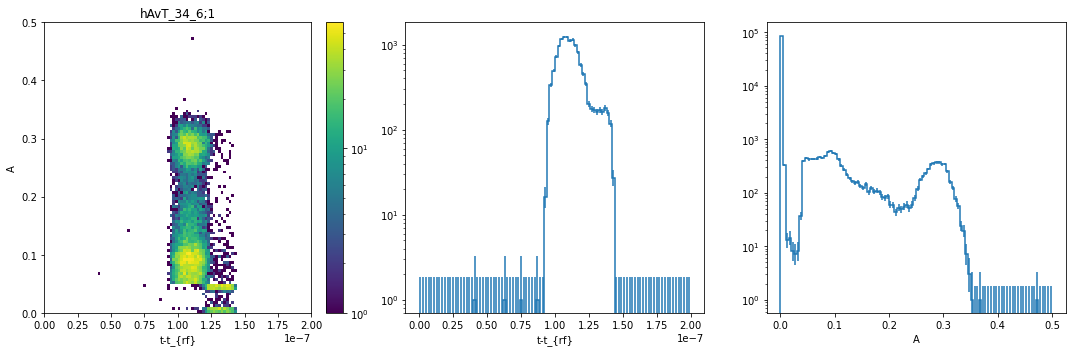

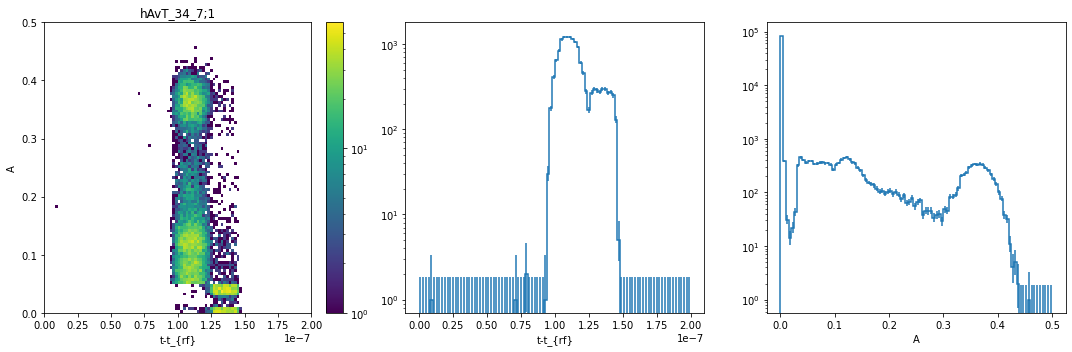

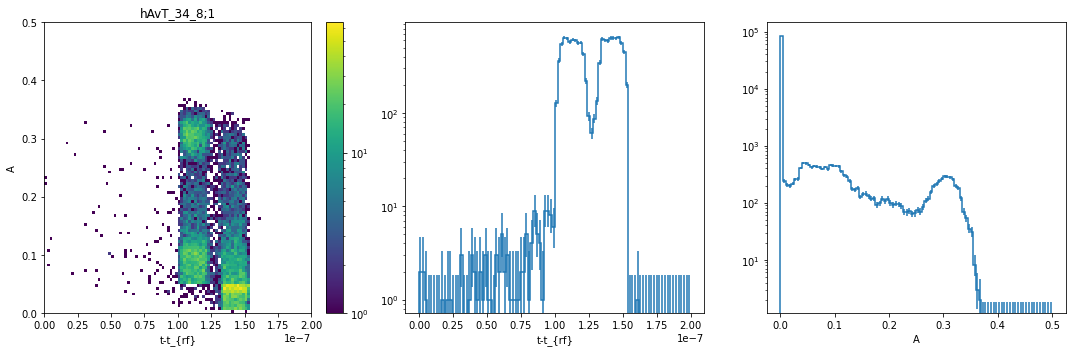

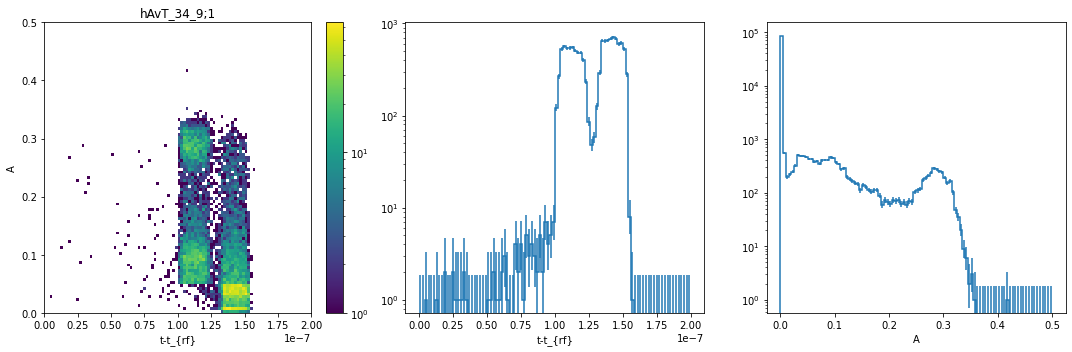

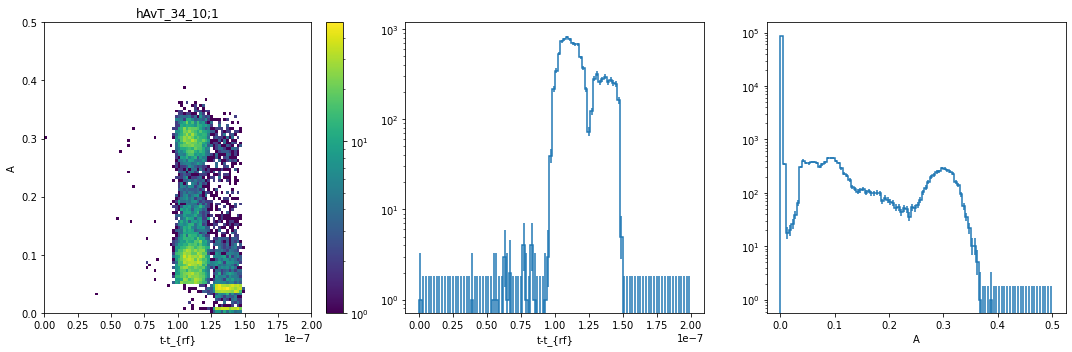

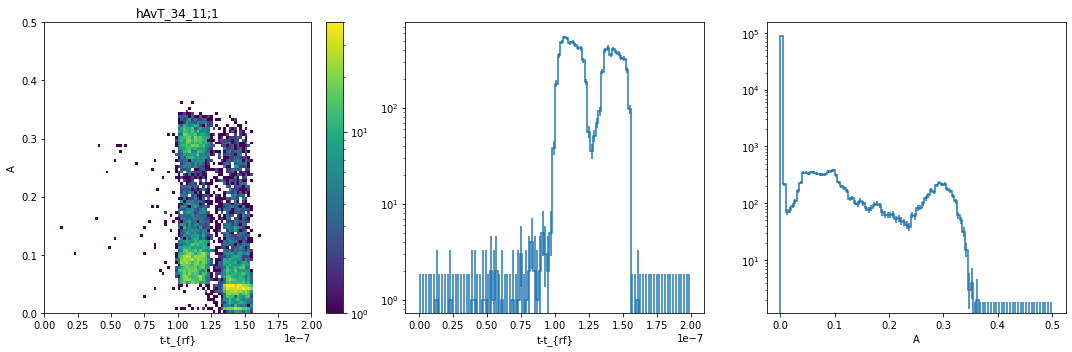

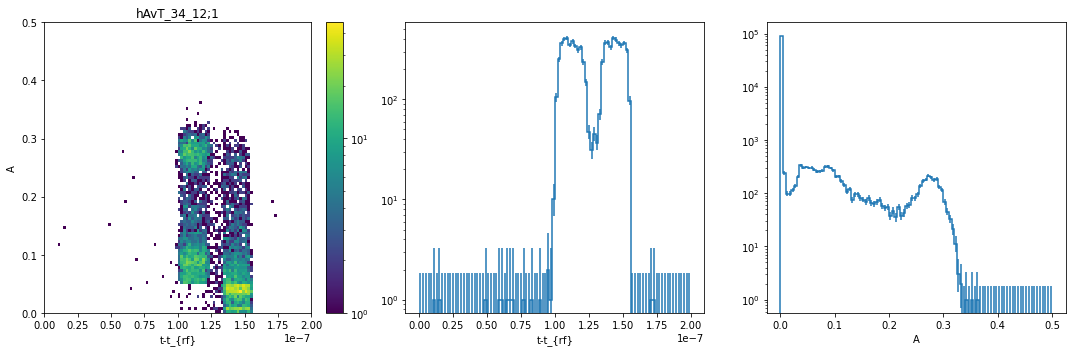

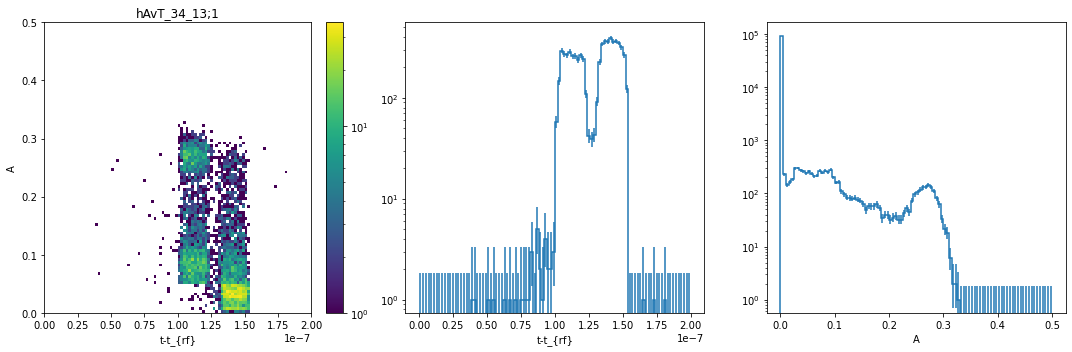

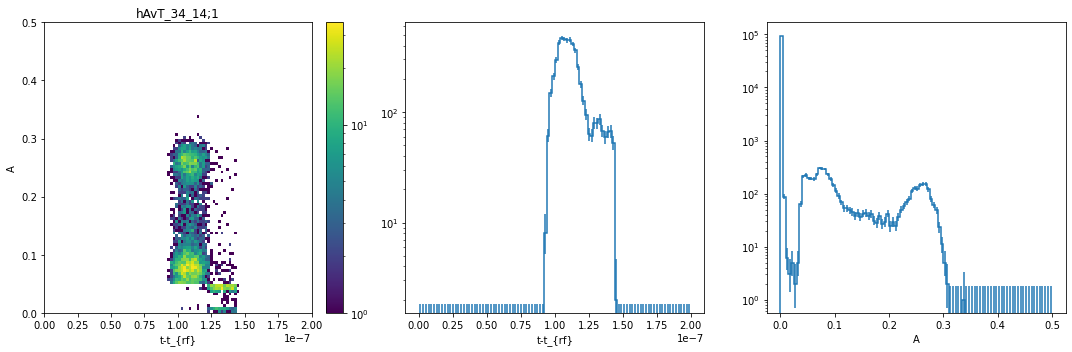

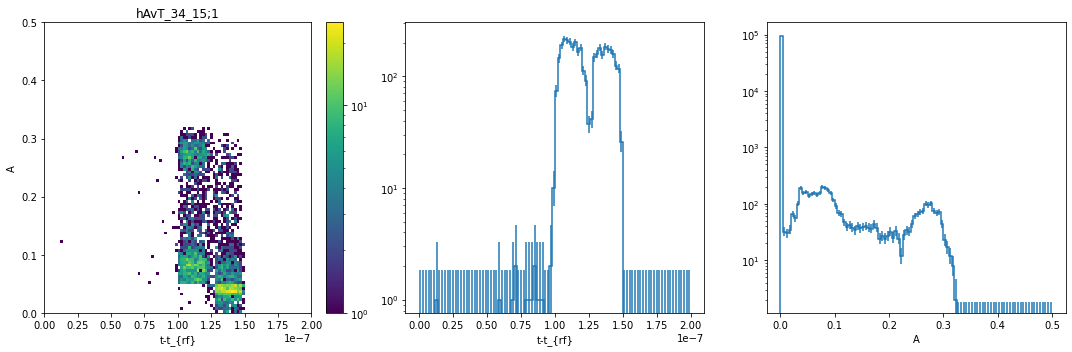

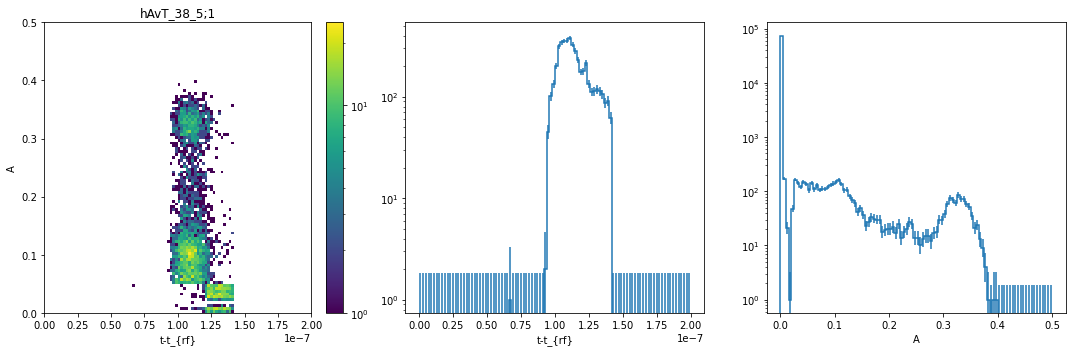

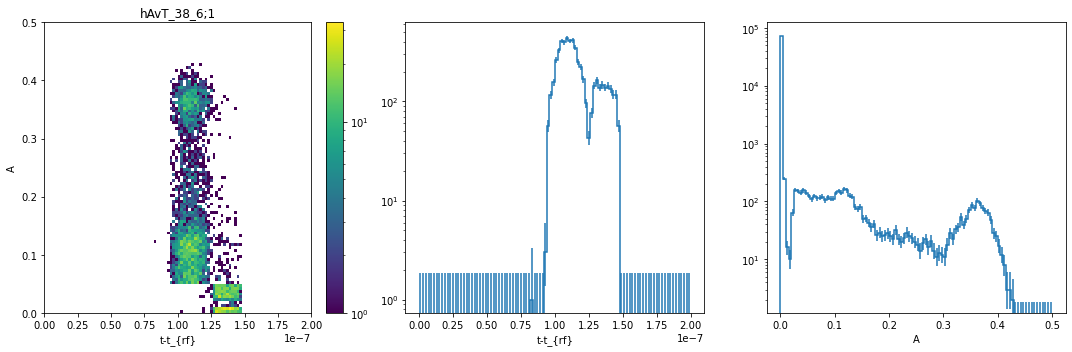

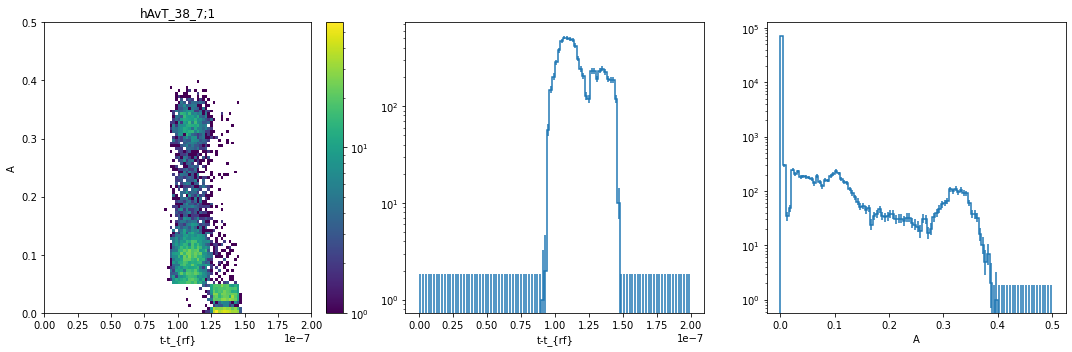

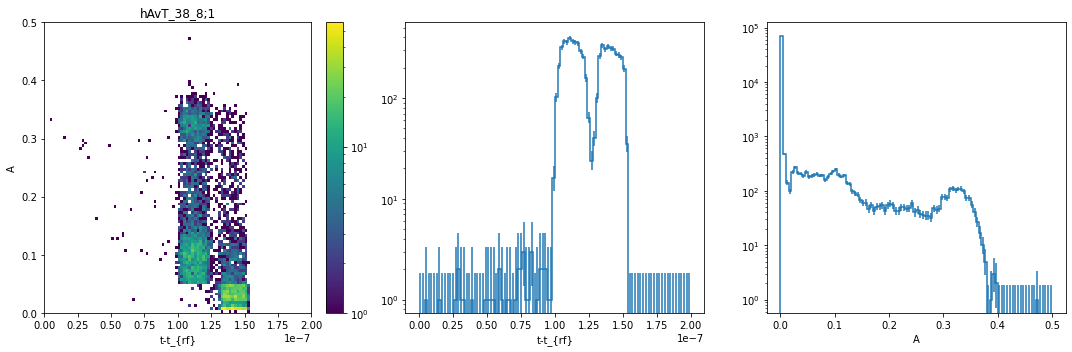

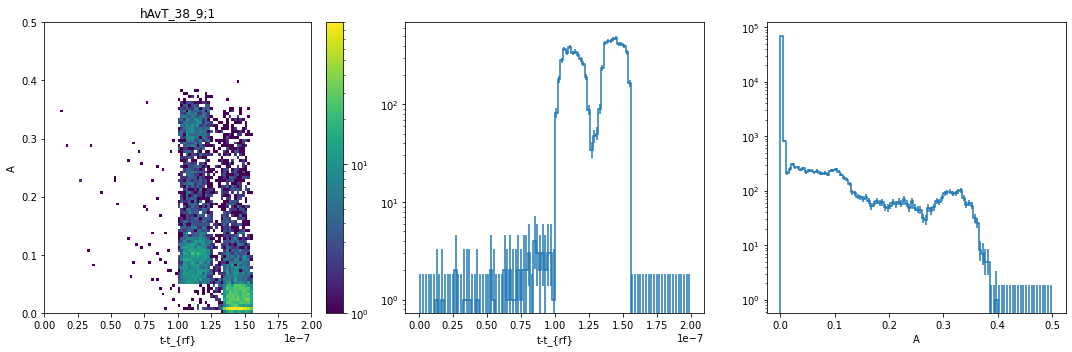

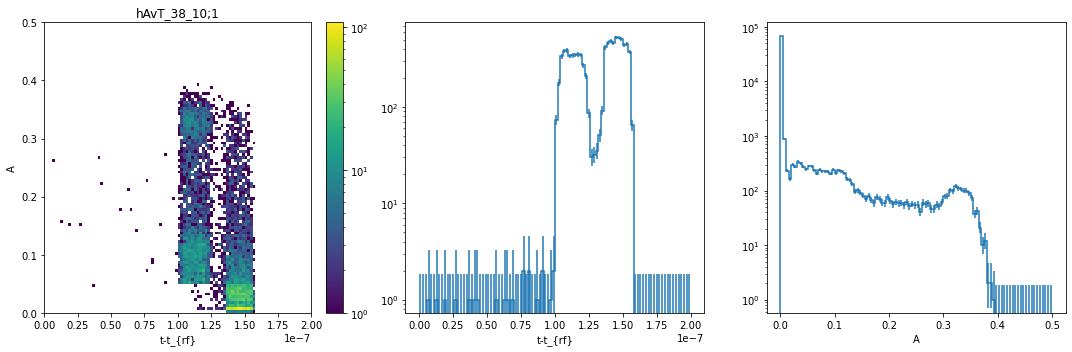

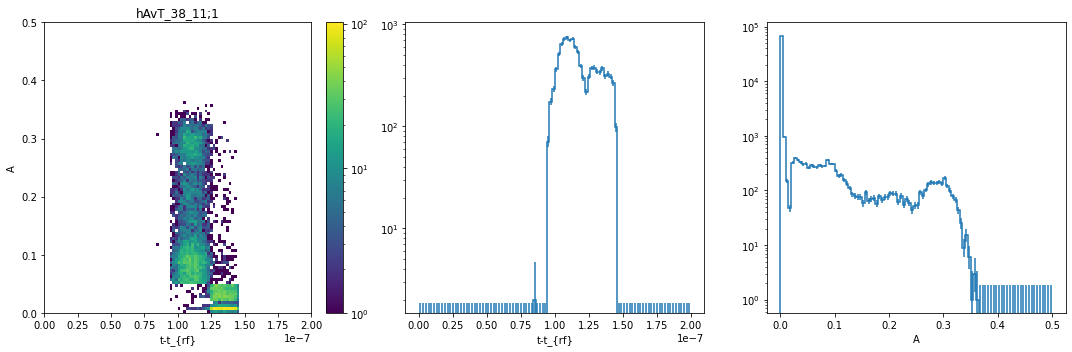

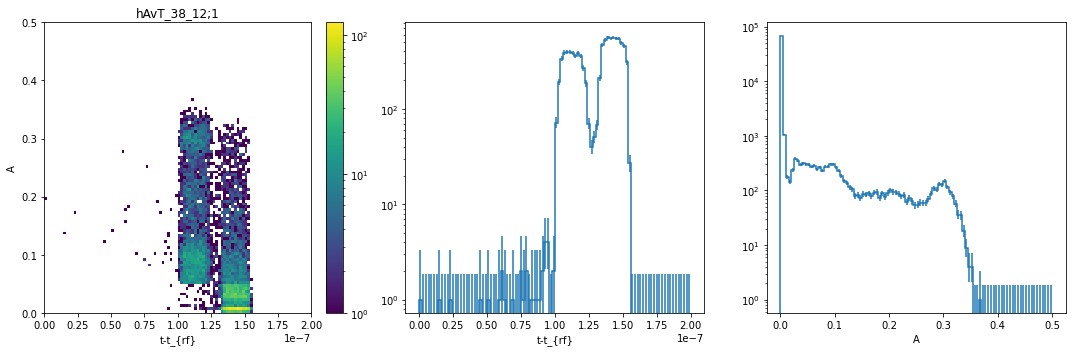

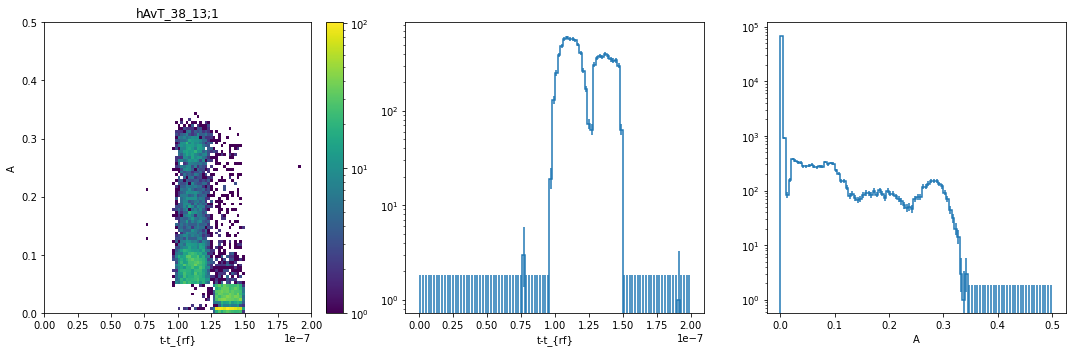

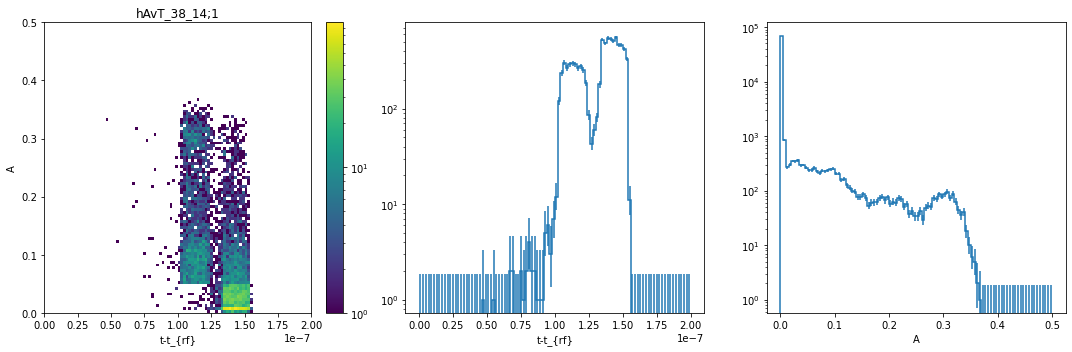

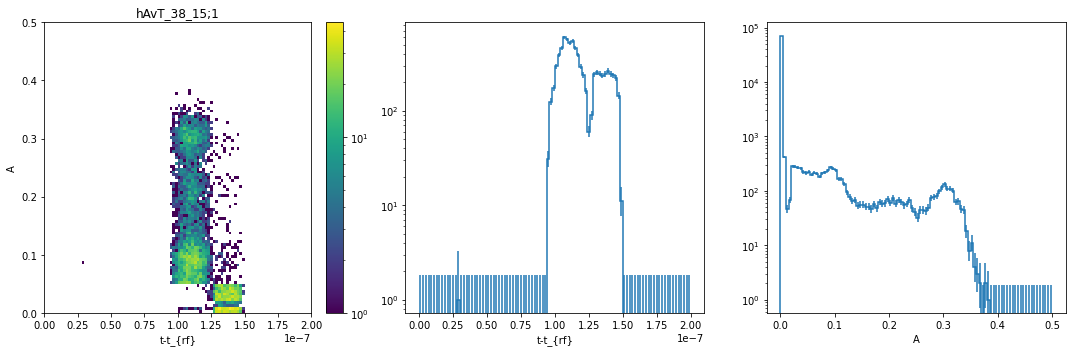

In [15]:
for x in hists:
    if(hists[x].sum() > 1):
        fig,ax = plt.subplots(1,3,figsize=(15,5))
        hists[x].plot(ax=ax[0], norm=matplotlib.colors.LogNorm(vmin=1))
        hists[x].project(0).plot(ax=ax[1])
        ax[1].set_yscale("log")
        hists[x].project(1).plot(ax=ax[2])
        ax[2].set_yscale("log")
        plt.title(x)
        plt.tight_layout()
        plt.show()
        
        # break

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8e4d41ca30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

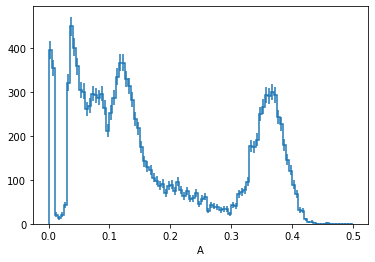

In [20]:
hists['hAvT_34_7;1'][1::sum,:].plot()